**1A**

In [8]:
import numpy as np
import scipy.stats as st

ex1a = np.array([.43, .15, .54, .18, .93, .21, .64, .51, .72, .81,\
                 .87, .59, .98, .02, .28, .52, .51, .24, .77, .66])

def OneAFunction(x):
    return (2-(-2))*(np.exp((-2 + (2-(-2))*x)))/(1 + np.exp((-2 + (2-(-2))*x)**2))

output = OneAFunction(ex1a)

mean = np.mean(output)

interval = st.t.interval(0.95, len(output)-1, loc=mean, scale=st.sem(output))

print(mean)

print(mean - interval[0])

1.6016921671967217
0.5143047335166973


**1B**

In [2]:
import math

def OneBFunction(s_size, s_interval, d_interval):
    return math.ceil(s_size*(s_interval/d_interval))

print(OneBFunction(20, 0.5143, 0.02))

515


**2**

In [3]:
def TwoFunction(num_samples, sample_size, conf, true_val):
    counter = 0
    for i in range(num_samples):
        sample = np.random.uniform(size=sample_size)
        output = OneAFunction(sample)
        mean = np.mean(output)
        interval = st.t.interval(conf, len(output)-1, loc=mean, scale=st.sem(output))
        if interval[0] <= true_val <= interval[1]:
            counter += 1
    return counter/num_samples

print(TwoFunction(100, 100, .95, 1.42511))

0.97


**3**

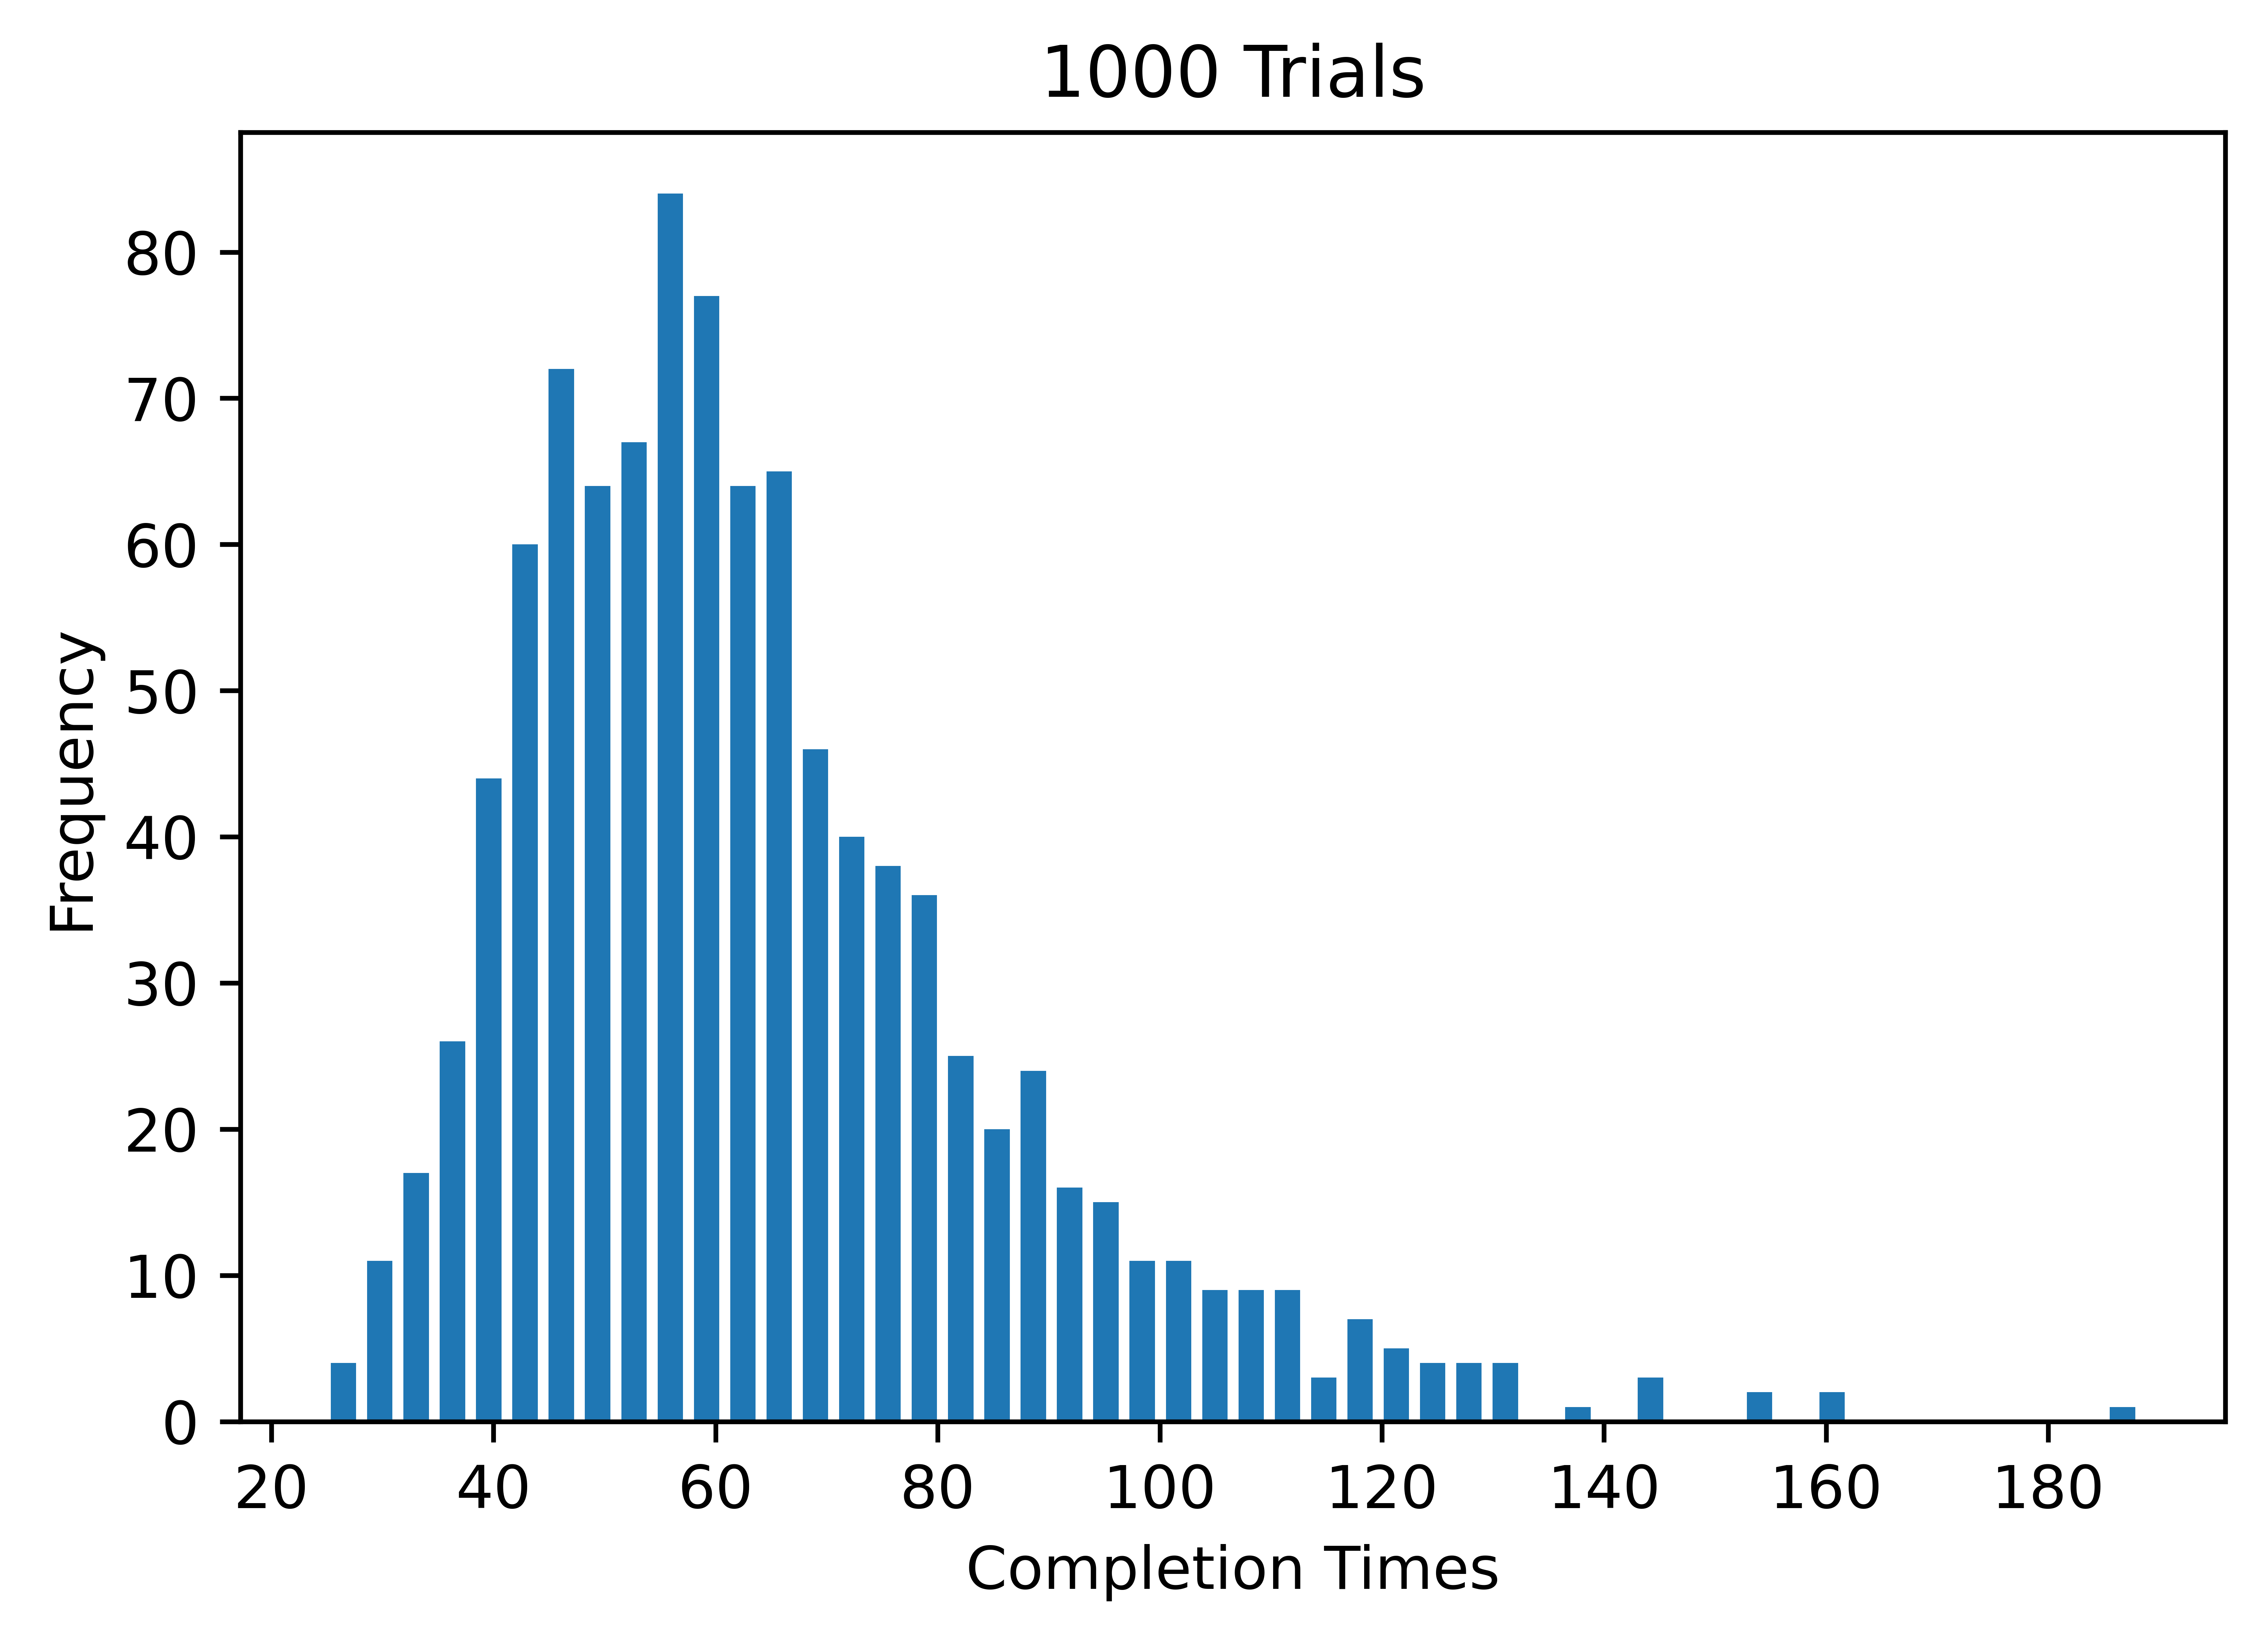

Mean duration for 1000 trials:  64.14548020089137
Confidence intervals for 1000 trials:  [0.059463461346415114, 2.7907501154656247]
Percentiles for 1000 trials: [37.366920594208416, 48.795666920149024, 59.60475302475156, 74.61387277308616, 107.19537699297842]


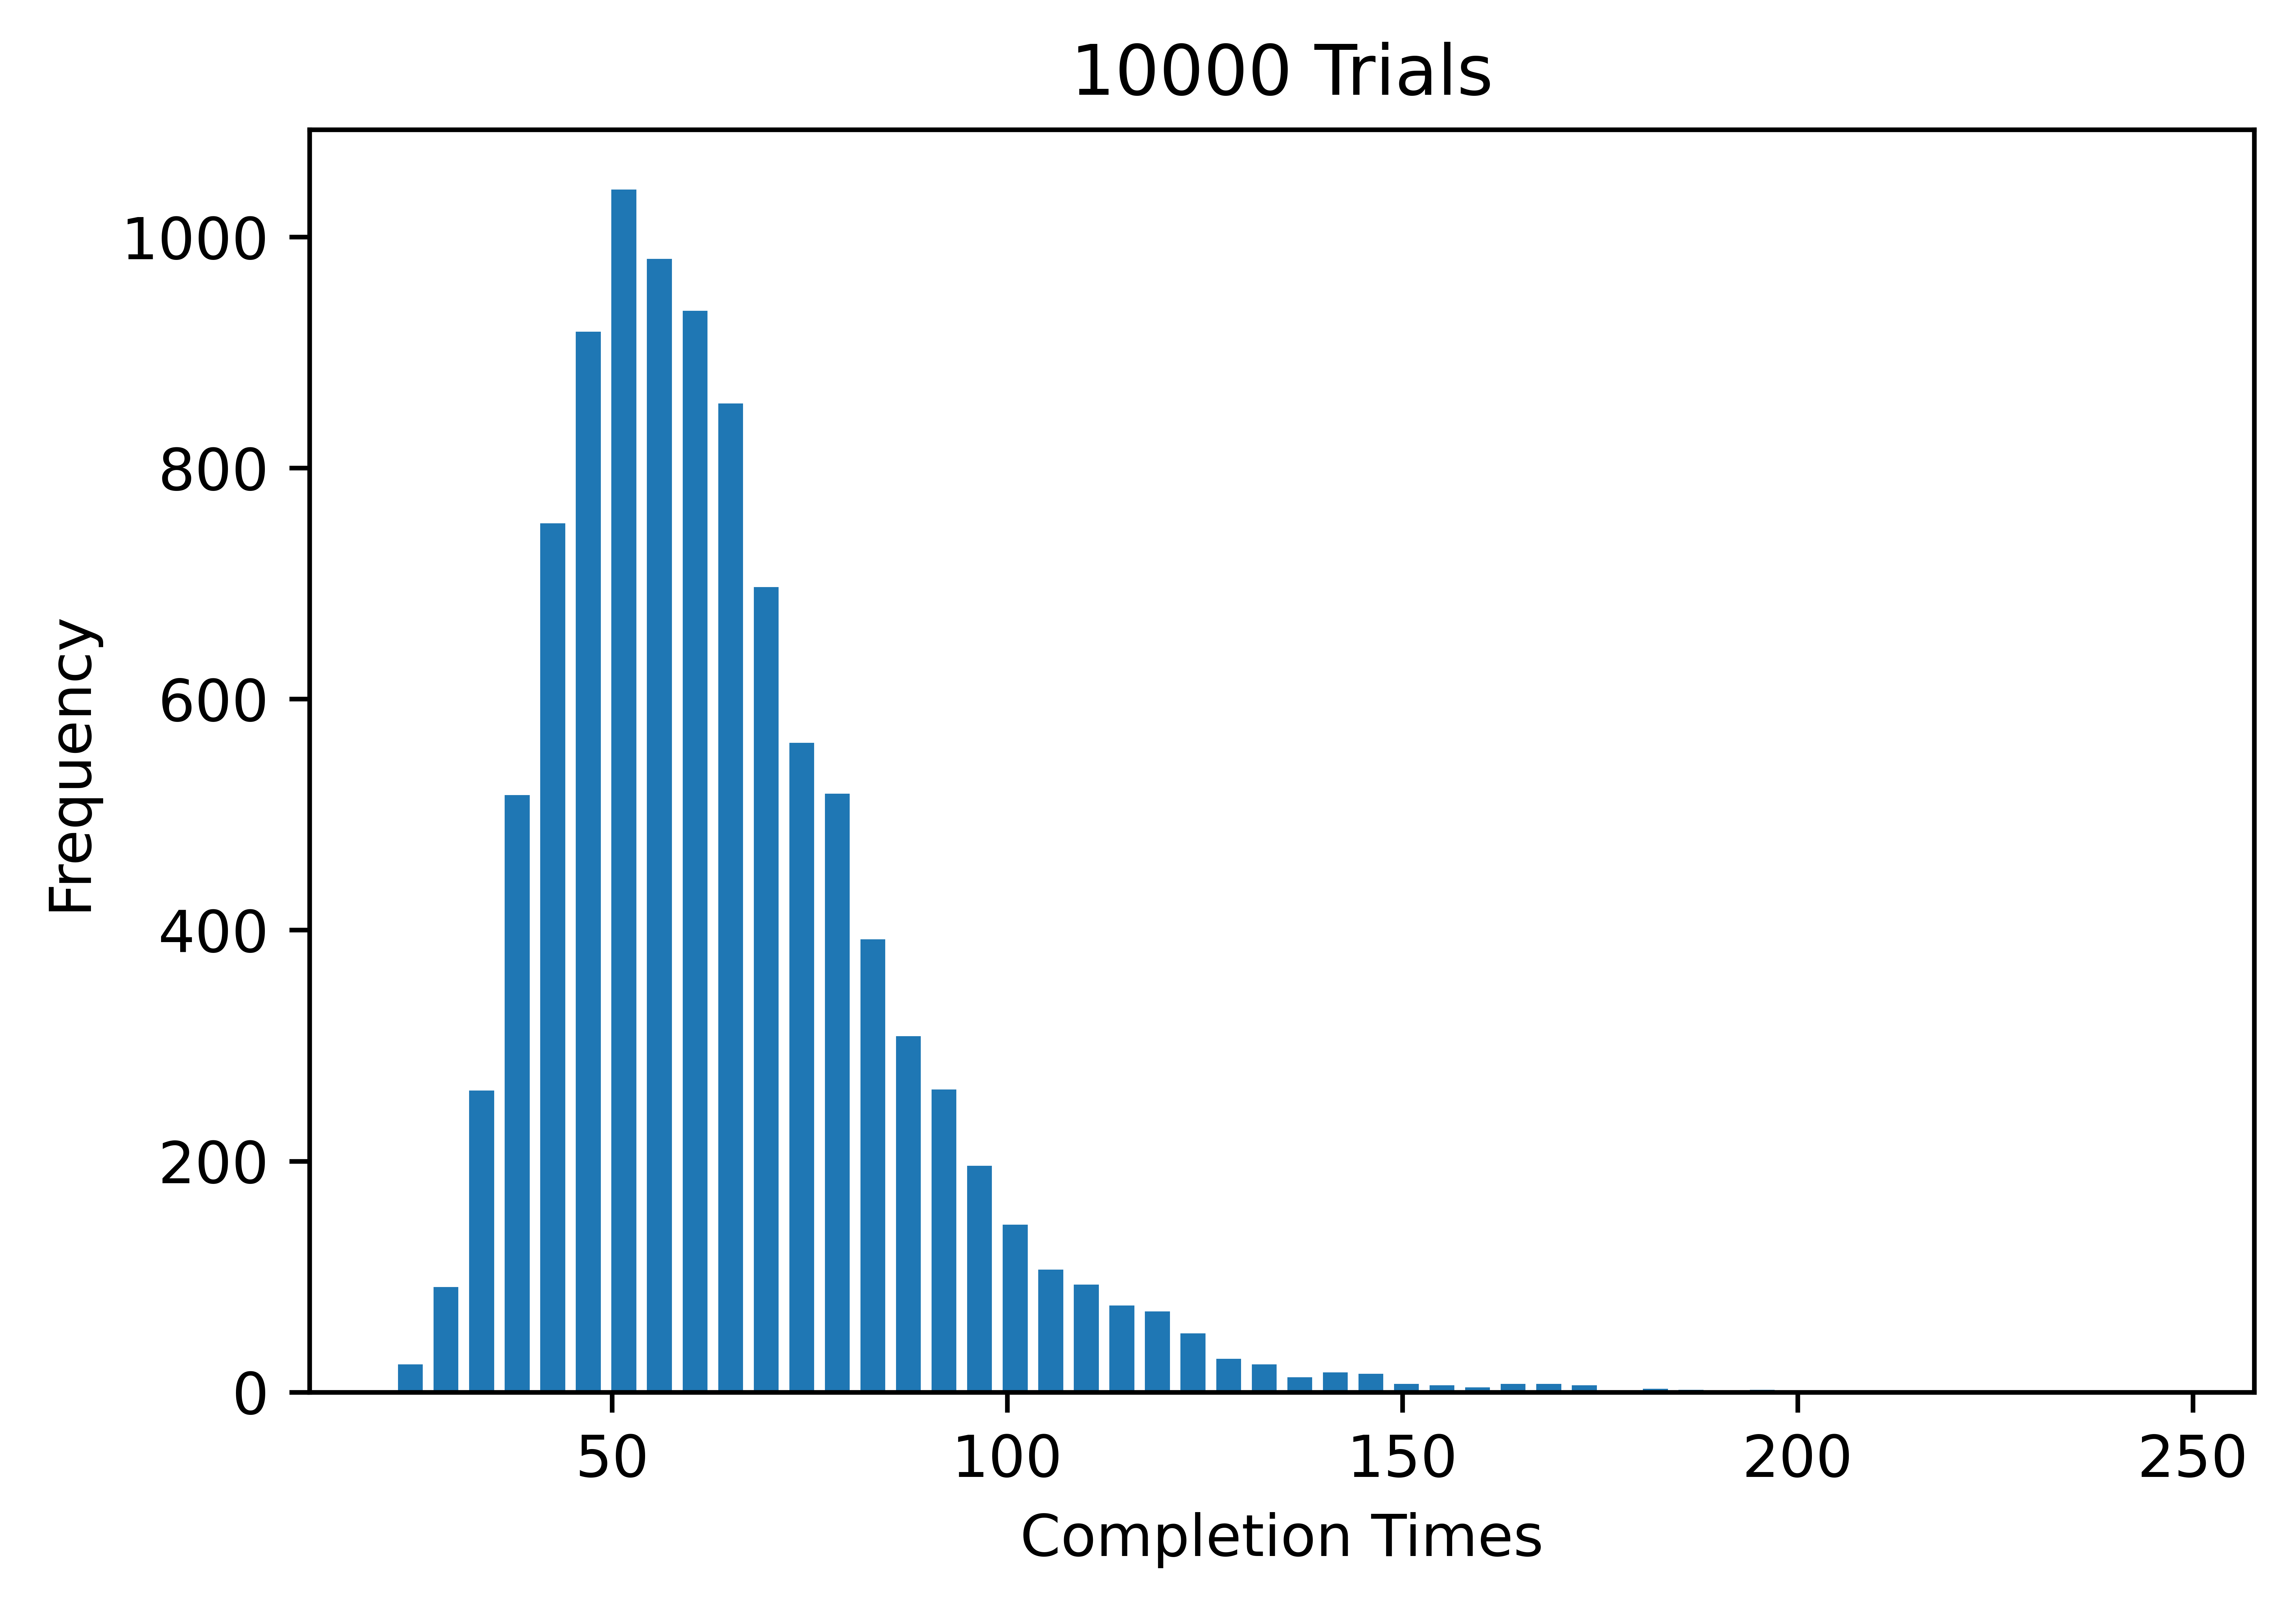

Mean duration for 10000 trials:  64.17926734748941
Confidence intervals for 10000 trials:  [0.9989185338386879, 1.8512950429733517]
Percentiles for 10000 trials: [36.95322426193479, 48.986840401796066, 60.15340618746427, 75.09844577957998, 104.76658677022824]


In [5]:
from matplotlib import pyplot as plt

def NRV(dist):
    return np.random.normal(dist, dist/4)

def exp(dist):
    return np.random.exponential(dist)

def ThreeFunction(trials):
    
    project_duration_total = np.array([])
    
    for i in range(trials):
        OneTwo = NRV(13)

        OneThree = NRV(5.5)

        TwoThree = exp(7)

        TwoFour = NRV(5.2)

        TwoSix = exp(16.5)

        ThreeSix = exp(14.7)

        FourFive = exp(6)

        FourSeven = exp(10.3)

        FiveSix = exp(20)

        FiveEight = exp(4)

        SixNine = NRV(3.2)

        SevenEight = NRV(3.2)

        EightNine = exp(16.5)

        arc_1369 = OneThree + ThreeSix + SixNine

        arc_1269 = OneTwo + TwoSix + SixNine

        arc_124789 = OneTwo + TwoFour + FourSeven + SevenEight + EightNine

        arc_124569 = OneTwo + TwoFour + FourFive + FiveSix + SixNine

        arc_124589 = OneTwo + TwoFour + FourFive + FiveEight + EightNine

        arc_12369 = OneTwo + TwoThree + ThreeSix + SixNine
        
        duration = max([arc_1369, arc_1269, arc_124789, arc_124569, arc_124589, arc_12369])
        
        project_duration_total = np.append(project_duration_total, duration)
        
    mean_time = np.mean(project_duration_total)
    
    length = len(project_duration_total)
    
    std_dev = np.std(project_duration_total, ddof = 1)
    
    alpha = (1 - .95) / 2
    
    t_star = st.t.ppf(alpha, length-1)
    
    ci_lower = mean_time + t_star * std_dev / np.sqrt(n)
    
    ci_upper = mean_time - t_star * std_dev / np.sqrt(n)
    
    interval = [ci_lower, ci_upper]
    
    Five_per = np.percentile(project_duration_total, 5)
    
    TwentyFive_per = np.percentile(project_duration_total, 25)
    
    Fifty_per = np.percentile(project_duration_total, 50)
    
    SeventyFive_per = np.percentile(project_duration_total, 75)
    
    NinetyFive_per = np.percentile(project_duration_total, 95)
    
    percentiles = [Five_per, TwentyFive_per, Fifty_per, SeventyFive_per, NinetyFive_per]
    
    return (project_duration_total, mean_time, interval, percentiles)

output_1000 = ThreeFunction(1000)

hist, bins = np.histogram(output_1000[0], bins = 50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(dpi = 1200)
plt.bar(center, hist, align='center', width=width)
plt.title('1000 Trials')
plt.xlabel('Completion Times')
plt.ylabel('Frequency')
plt.savefig('1000.png')
plt.show()

print('Mean duration for 1000 trials:', output_1000[1])

print('Confidence intervals for 1000 trials:', output_1000[2])

print('Percentiles for 1000 trials:', output_1000[3])

output_10000 = ThreeFunction(10000)

hist, bins = np.histogram(output_10000[0], bins = 50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(dpi = 1200)
plt.bar(center, hist, align='center', width=width)
plt.title('10000 Trials')
plt.xlabel('Completion Times')
plt.ylabel('Frequency')
plt.savefig('10000.png')
plt.show()

print('Mean duration for 10000 trials:', output_10000[1])

print('Confidence intervals for 10000 trials:', output_10000[2])

print('Percentiles for 10000 trials:', output_10000[3])

In [ ]:
x = [234, 43]
# st.zscore(mean_test)

n = len(x)  # Sample size
x_bar = np.mean(x)  # Mean
s = np.std(x, ddof=1)  # Sample standard deviation

# Desired confidence level
C = 0.95

# Calculate confidence interval
df = n - 1
alpha = (1 - C) / 2
t_star = st.t.ppf(alpha, df)
ci_lower = x_bar + t_star * s / np.sqrt(n)
ci_upper = x_bar - t_star * s / np.sqrt(n)

print(f'We are 95% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

In [6]:
output_100000 = ThreeFunction(100000)

print('Mean duration for 100000 trials:', output_100000[1])

print('Confidence intervals for 100000 trials:', output_100000[2])

print('Percentiles for 100000 trials:', output_100000[3])

Mean duration for 100000 trials: 63.92111215145387
Confidence intervals for 100000 trials: [1.2914331745005223, 1.5587804023115173]
Percentiles for 100000 trials: [36.824855527803045, 48.6371831923182, 59.945569147169, 74.73198288556269, 104.5683941632296]
